<a href="https://colab.research.google.com/github/brenda1602/DL_TensorFlow/blob/master/Classifica%C3%A7%C3%A3o_6_Classifica%C3%A7%C3%A3o_de_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Importar dados 

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

tf.__version__


'2.2.0'

#2- Dados

In [ ]:
pacientes = pd.read_csv('/content/diabetes.csv')

In [ ]:
pacientes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
positive= pacientes[pacientes['Outcome']==1]
positive

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [ ]:
negative=pacientes[pacientes['Outcome']==0]
negative

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


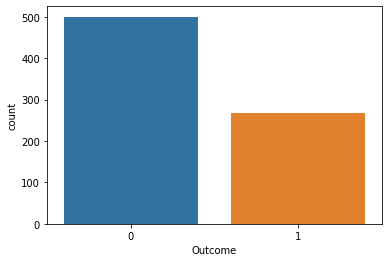

In [ ]:
sns.countplot(pacientes['Outcome'], label='Count')

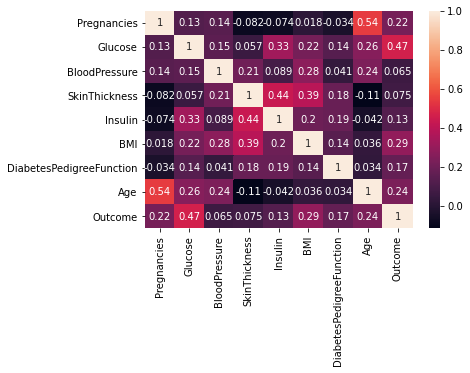

In [ ]:
sns.heatmap(pacientes.corr(), annot= True)

#3- Manipulação dos dados

In [ ]:
x= pacientes.iloc[:,0:8].values
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
y= pacientes.iloc[:,8].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(x,y, test_size=0.2)

In [ ]:
X_train.shape

(614, 8)

#4- Treinamento

In [ ]:
model= tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=400,activation= 'relu',input_shape=(8,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=400, activation= 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])
epochs_hist=model.fit(X_train,Y_train,epochs=200)

Epoch 1/200
20/20 [==============================] - 0s 3ms/step - loss: 0.5391 - accuracy: 0.7182
Epoch 2/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4533 - accuracy: 0.7915
Epoch 3/200
20/20 [==============================] - 0s 4ms/step - loss: 0.4500 - accuracy: 0.7818
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4335 - accuracy: 0.7883
Epoch 5/200
20/20 [==============================] - 0s 4ms/step - loss: 0.4242 - accuracy: 0.8013
Epoch 6/200
20/20 [==============================] - 0s 4ms/step - loss: 0.4140 - accuracy: 0.8046
Epoch 7/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4102 - accuracy: 0.7997
Epoch 8/200
20/20 [==============================] - 0s 4ms/step - loss: 0.4038 - accuracy: 0.8094
Epoch 9/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3945 - accuracy: 0.8274
Epoch 10/200
20/20 [==============================] - 0s 3ms/step - loss: 0.3957 - accuracy: 0.8208
Epoch 11/

In [ ]:
y_pred= model.predict(X_test)

In [ ]:
y_pred= (y_pred>0.5)

# 5- Teste

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

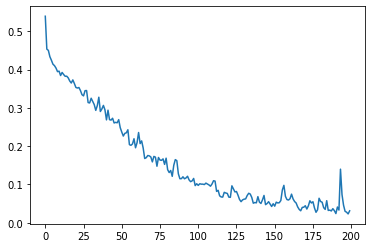

In [ ]:
plt.plot(epochs_hist.history['loss'])


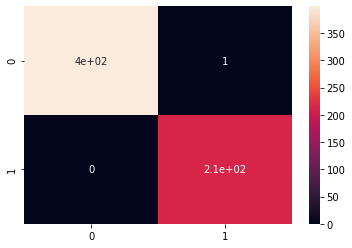

In [ ]:
from sklearn.metrics import confusion_matrix
y_train_pred = model.predict(X_train)
y_train_pred =(y_train_pred>0.5)
cm= confusion_matrix(Y_train,y_train_pred)
sns.heatmap(cm,annot=True)